<a href="https://colab.research.google.com/github/ssnirgudkar/Datasetpaper-final/blob/main/IR_7classes_Unet_Finalpaper_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use this as the final code. - DOES NOT USE ANY PREEXISTING WEIGHTS

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/train.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/trainannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/val.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/valannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/test.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IRDatasetConsolidated/testannot.zip", "r")
zip_ref.extractall("/content/IRDatasetFinal")
zip_ref.close()


In [ ]:
import os 
APP_FOLDER = '/content/IRDatasetFinal/train'
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
   

print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /content/IRDatasetFinal/train
Total number of files 26081
Total Number of directories 0
Total: 26081


1. no of classes if mentioned 3, then the labels **can only** have values of 0,1 and 2
2. You can check the actual error using CPU, and not GPU
3. softmax is good for image segmentation. it's a probablistic algorithm, so the losses also haev to be accordingly. all of the below are with softmax activation. optimizers are changed in the middle.  
4. relu / leakyrelu, adam will work 
5. **Option 1-** leakyrelu - epoc 50, 62 images of which validation images 3. batch size 3 , kernel_initializer = 'he_normal'- , leakyrelu, sparse_categorical_crossentropy, optimizer - rmsprop: val_loss went from 87 to 0.2. But it was not continually reducing and was fluctutating.  Output segmentation was good. obstacles were showing up.
6. **Option 2- **RELU, epoc 50, total images - 62, validation 3 images, sparse_categorical_crossentropy, kernel_initializer = 'he_normal', optimizer = rmsprop: Val_loss started from 127 and went to 0.08. was better converging than option 1, but still not always decreasing. Image output better than option 1
7. Option 3: **RELU, epoc 50, total images - 62, validation 3 images, sparse_categorical_crossentropy, kernel_initializer = 'he_normal', optimizer = adam, defalt learn rate(lr): Val_loss started from 45 and went to 0.0528. The val loss continually decreased and converged. Image output better than option 1 and 2. Observations - reflection in water is shown as an obstacle. Bits of water are shown as cloud
8. Option 4: **RELU, epoc 50, total images - 62, validation 3 images, categorical_crossentropy, kernel_initializer = 'he_normal', optimizer - adam, lr = 0.01: Val_loss started from 476 billion  and went to NAN in the 6th apoch. No segmentation output available. it was all black. Tried to change the loss to sparse_categorical_crossentropy with the same lr - 0.01, but the op was worse than that with default lr = 0.001  
Kept the loss to sparse_categorical_crossentropy , but changed the lr to 0.005. That works comparable to lr = 0.001(default), but a touch lower. Some images are at par with default lr, some are not.   
9. adam, lr = 0.001(default), softmax, kernel_initializer = 'uniform'. val_loss starts from 2.4 to 0.06. Some images with this are better than those using he_normal. 
**Recommendation - adam, sparse_categorical_crossentropy, relu, lr=. default = 0.001, kernal initilizer = 'he_normal' OR kernal initilizer = 'uniform'**

Training results - 
1. Ran with 291 IR images (including night _ pilot IR. Mirror images of those + labeled) = 882 images in this directory. The checkpoint file is IR_1000images_uniform_adam_softmax_100_10.h5. Indictes, it was run for 1000 images, uniform kernel initializer, adam optimizer, softmax algo, 100 epochs with a batch size of 10. No of classes are 4 (0 thru 3). This was run with TPU. Per Epoc (86 batches with a batch size of 10 - estimate time was 10 min). Val_loss for epoc 1 was 5.0147 although average loss was 0.3 for each batch. Then ran with GPU to see which one to go with. GPU checking the unique label value took lot of time for 800 images. However, the training time - 1 epoch 1st batch with 86 batches with a batch size of 10 - estimate was only 2 min. Val loss was 7 although loss was 0.1. So GPU was much faster for training than TPU.Also TPU libraries to be imported change, plus TPU gives verbose explanbation of error as against GPU that just says NAN

Results - IMP - numbering, and number of images shoild be exactly same between image and masks. The algo sorts it and uses it one to one. else we will see very bad losses and bad inference. 
Epoch 25/25
837/837  - 188s 224ms/step - loss: 0.0197 - val_loss: 0.0206

# Now i save model from run1, and use that saved model to restart training in run2. so each time i run, the model is getting retrained. i need to be careful that if i am running a test (w/o good data), i shld not save the model, else it will corrupt the earlier learning. 

 
 

# Image segmentation with a U-Net-like architecture

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2019/03/20<br>
**Last modified:** 2020/04/20<br>
**Description:** Image segmentation model trained from scratch on the Oxford Pets dataset.

##Run1 - No preloaded weights
train - 2570, val - 740, test - 370 , Epochs - 500 
Training time - 5 hrs
##Run 2 - No preloaded weights
train - , val - , test - , Epochs - 100
Training time -  failed due to NAN 
##Run 3 - No preloaded weights - 24K + images
train - 24814, val - 7090, test - 3544, Epochs - 76
Training time -  14 hrs, Testing time - failed with OOM after 20 min with GPU , after 23 min with TPU. Now running with TPU - High Ram. this completed in 20 min
##Run 4 - No preloaded weights - resize + mirror  
train - 3438  , val - 982  , test - 492 , Epochs - 50
Training time - 1 hr 22 min  hrs, Testing time - 5 min
 
##Run5 - No preloaded weights - actual images (no mirror/rotate) . GPU + High RAM
train - 2004  val - 572 test - 288 , epochs = 50
training time - 2 hrs, testing - 3 min  
Model - Unet-7classes-finalpapersubmission_V1
file names prefix - run2 

##Run6 - No preloaded weights - actual images (no mirror/rotate) . GPU (Standard RAM)
train - 2004  val - 572 test - 288 , epochs = 50
training time - 2 hrs, testing - 3 min  
Model - Unet-7classes-finalpapersubmission_V1
file names prefix - run2 

##Run 7 - No preloaded weights - actual size images + mirror + rotate . GPU (Standard RAM)
train - 26081  val - 7452  test - 3726 , epochs = 100
training time - 2 days, testing -  min  
Model - /Models/Unet-7classes-finalpapersubmission2
file names prefix - run11 
Loss - 0.0341




## Download the data

In [ ]:
import tensorflow as tf
print("keras version is", tf.keras.__version__)
print ("tf version is", tf.__version__) 
!python --version

keras version is 2.7.0
tf version is 2.7.0
Python 3.7.12


In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
#!cd "drive/My Drive/PhD/IRLabeledDataset"
'''

Mounted at /content/drive


## Prepare paths of input images and target segmentation masks

In [ ]:
'''this is a test code to check syntax 
flag = 0 
ideal_label_array = [0,1,2,3]
target_label_array = [0,1,2,3,5]
if(set(target_label_array).issubset(set(ideal_label_array))):
  flag = 0
else:    
  flag = 1 
  print("Error in label", target_label_array ) 
'''

In [ ]:
import os
import numpy as np
import cv2

input_dir = "/content/IRDatasetFinal/train" # directory containing 2570 IR input images
target_dir = "/content/IRDatasetFinal/trainannot" # directory containing 2570 segmented IR images

input_dir_val = "/content/IRDatasetFinal/val" # directory containing 2570 IR input images
target_dir_val = "/content/IRDatasetFinal/valannot" # directory containing 2570 segmented IR images

input_dir_test = "/content/IRDatasetFinal/test" # directory containing 2570 IR input images
target_dir_test = "/content/IRDatasetFinal/testannot" # directory containing 2570 segmented IR images

img_size = (512, 640) #it's height and width. it's a 1/2 sized image from the original image from segment.ai
#img_size = (512, 640) #it's height and width. This is the original image from segment.ai
#img_size_width_ht = (320,256)
img_size_width_ht = (640,512)

num_classes = 7
batch_size = 10
test_batch_size = 2
epochs = 100 

# check for distinct label values in all masked files 
def getFullyQualifiedImagePaths(image_dir):
  return sorted([ os.path.join(image_dir, fname)
                  for fname in os.listdir(image_dir)
                  if fname.endswith(".png")
                ])




In [ ]:
#prints how many files are in the train batch
input_img_paths = getFullyQualifiedImagePaths(input_dir)
target_img_paths = getFullyQualifiedImagePaths(target_dir)

print("Number of train images:", len(input_img_paths))
print("Number of train masks:", len(target_img_paths))

#prints how many files are in the validation batch
input_val_paths = getFullyQualifiedImagePaths(input_dir_val)
target_val_paths = getFullyQualifiedImagePaths(target_dir_val)

print("Number of validation images:", len(input_val_paths))
print("Number of validation masks:", len(target_val_paths))

#prints how many files are in the test batch
input_test_paths = getFullyQualifiedImagePaths(input_dir_test)
target_test_paths = getFullyQualifiedImagePaths(target_dir_test)

#prints how many files are in the batch
print("Number of test images:", len(input_test_paths))
print("Number of test masks:", len(target_test_paths))



#prints the name of 10 sets of input and labeled file
for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)

#print((cv2.imread('/content/drive/MyDrive/TheIRDatasetMini/trainannot/j02972132_1_41_2.png',cv2.IMREAD_UNCHANGED)))


'''
#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING
#below code checks if the labels are in the 1 through 3 range (4 classes - sky,water,object,background). 
#Because if not, then model training gives a NAN error.
#it displays the label file that has an error, and the values of the label
ideal_label_array = [0,1,2,3,4,5,6] # depends on the number of classes
flag = 0 

for target_path in (target_img_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    if(set(target_label_array).issubset(set(ideal_label_array))):
       flag +=1
       #print("good label", flag)
    else:    
       flag +=1
       print("Error in label", flag,target_path,target_label_array )  
'''
'''
for target_path in (target_val_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    if(set(target_label_array).issubset(set(ideal_label_array))):
       flag +=1
       #print("good label", flag)
    else:    
       flag +=1
       print("Error in label", flag,target_path,target_label_array )  
      

'''
'''
#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING
#below code checks which testing files have living obstacles and obstacles. this way we can use them for prediction
ideal_label_array = [3,4] # depends on the number of classes
flag = 0 
for index, target_path in enumerate(target_test_paths):
    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))
    #if(set(target_label_array).issubset(set(ideal_label_array))):
    if len(np.intersect1d(target_label_array, ideal_label_array)) == 2:  
       print("file has obstacle & living ob", index,target_path,target_label_array )  
       #print(np.intersect1d(target_label_array, ideal_label_array))
       #print (target_label_array)  
'''      

Number of train images: 26081
Number of train masks: 26081
Number of validation images: 7452
Number of validation masks: 7452
Number of test images: 3726
Number of test masks: 3726
/content/IRDatasetFinal/train/a1570555799_168847.png | /content/IRDatasetFinal/trainannot/a1570555799_168847.png
/content/IRDatasetFinal/train/a1570555799_168847_412.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_412.png
/content/IRDatasetFinal/train/a1570555799_168847_412_2.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_412_2.png
/content/IRDatasetFinal/train/a1570555799_168847_415.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_415.png
/content/IRDatasetFinal/train/a1570555799_168847_415_2.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_415_2.png
/content/IRDatasetFinal/train/a1570555799_168847_417.png | /content/IRDatasetFinal/trainannot/a1570555799_168847_417.png
/content/IRDatasetFinal/train/a1570555799_168847_417_2.png | /content/IRDatasetFinal/trainann

'\n#COMMENTING THIS CODE AS THE CHECK HAS ALREADY BEEN DONE DURING PREPROCESSING\n#below code checks which testing files have living obstacles and obstacles. this way we can use them for prediction\nideal_label_array = [3,4] # depends on the number of classes\nflag = 0 \nfor index, target_path in enumerate(target_test_paths):\n    target_label_array = (np.unique(cv2.imread(target_path,cv2.IMREAD_UNCHANGED)))\n    #if(set(target_label_array).issubset(set(ideal_label_array))):\n    if len(np.intersect1d(target_label_array, ideal_label_array)) == 2:  \n       print("file has obstacle & living ob", index,target_path,target_label_array )  \n       #print(np.intersect1d(target_label_array, ideal_label_array))\n       #print (target_label_array)  \n'

In [ ]:
# Inference 
#prints how many files are in the test batch
input_test_paths = getFullyQualifiedImagePaths(input_dir_test)
target_test_paths = getFullyQualifiedImagePaths(target_dir_test)

#prints how many files are in the batch
print("Number of test images:", len(input_test_paths))
print("Number of test masks:", len(target_test_paths))

#pattern of the test images and masks 
for input_path, target_path in zip(input_test_paths[:5], target_test_paths[:5]):
    print(input_path, "|", target_path)

Number of test images: 3726
Number of test masks: 3726
/content/IRDatasetFinal/test/a1570555799_168847_42.png | /content/IRDatasetFinal/testannot/a1570555799_168847_42.png
/content/IRDatasetFinal/test/a1570555799_168847_47_2.png | /content/IRDatasetFinal/testannot/a1570555799_168847_47_2.png
/content/IRDatasetFinal/test/a1570555803_968853_412_2.png | /content/IRDatasetFinal/testannot/a1570555803_968853_412_2.png
/content/IRDatasetFinal/test/a1570555803_968853_47.png | /content/IRDatasetFinal/testannot/a1570555803_968853_47.png
/content/IRDatasetFinal/test/a1570555914_968766_412_2.png | /content/IRDatasetFinal/testannot/a1570555914_968766_412_2.png


In [ ]:
'''
## This is a test to see how intersect runs in python 
arr1 = [1,2]
arr2 = [2,5,1]
if len(np.intersect1d(arr1, arr2)) == 2: 
     flag +=1
     print("intersect" ) 
     print(np.intersect1d(arr1, arr2))
else:
     print("no intersect" ) 
     print(np.intersect1d(arr1, arr2))
 
'''

## What does one input image and corresponding segmentation mask look like?

In [ ]:
'''
import cv2
import tensorflow
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import PIL

img = cv2.imread('/content/drive/MyDrive/IRImages_7classes_unet/1571161174.581624_1_2.png')
print(img) 
img1 = cv2.imread('/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161174.581624_1_2.png', cv2.IMREAD_UNCHANGED)
print(img1)
print(img.shape) # height , width, color
print(img1.shape)
array1 = tensorflow.keras.preprocessing.image.img_to_array(img)
print(array1) 
array2 = tensorflow.keras.preprocessing.image.img_to_array(img1)
print(array2) 
print(np.unique(array1))
print(np.unique(array2))
print(tensorflow.keras.backend.epsilon())
print(np.unique(cv2.imread('/content/drive/MyDrive/IRImages_7classes_unet/1571161174.581624_1_2.png')))
print(np.unique(cv2.imread('/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161174.581624_1_2.png',cv2.IMREAD_UNCHANGED)))
'''

In [ ]:
'''
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #9
display(Image(filename=input_img_paths[9]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[9]))
display(img)
'''

## Prepare `Sequence` class to load & vectorize batches of data

In [ ]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            #in case we want to see if masked image have the right values
            #print(tensorflow.keras.preprocessing.image.img_to_array(img))
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2: 
            #if classes are 3, keras expects masked values to be 0,1,2 only. Cannot take 1,3,5. It checks numerically not just the number of masked values
            #y[j] += 1 
        return x, y


## Prepare U-Net Xception-style model

In [ ]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2 ,padding="same",kernel_initializer = 'uniform')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("ReLU")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("ReLU")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same", kernel_initializer = 'uniform')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("ReLU")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same", kernel_initializer = 'uniform')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same", )(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same",  kernel_initializer = 'uniform')(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("ReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("ReLU")(x)
        x = layers.Conv2DTranspose(filters, 3,padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1,padding="same", kernel_initializer = 'uniform')(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same",kernel_initializer = 'uniform')(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 320, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 320, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

## Set aside a validation split

In [ ]:
import random

# Split our img paths into a training and a validation set. There are 8000 images in the input. 
# val_samples = 500
# random.Random(1337).shuffle(input_img_paths)
# random.Random(1337).shuffle(target_img_paths)
# train_input_img_paths = input_img_paths[:-val_samples]
# train_target_img_paths = target_img_paths[:-val_samples]
# val_input_img_paths = input_img_paths[-val_samples:]
# val_target_img_paths = target_img_paths[-val_samples:]

# In new scheme, we are dividing the whole dataset into training, validation and testing sets. So we do not need
# shuffling and creating validation set out of training data set.


# Instantiate data Sequences for each split

train_gen = OxfordPets(batch_size, img_size, input_img_paths, target_img_paths)

val_gen = OxfordPets(batch_size, img_size, input_val_paths, target_val_paths)



In [ ]:
# Inference 
import random
# Instantiate data Sequences for each split

test_gen = OxfordPets(test_batch_size, img_size, input_test_paths, target_test_paths)

## Train the model

In [ ]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.

import tensorflow as tf
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt)

#model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
'''
callbacks = [
    #commenting checkpoint because i am going to save the entire model and start with earlier model
    #keras.callbacks.ModelCheckpoint("IR_1000images_he_normal_adam_softmax_relu_300_10_1.h5", save_best_only=True),
    #tf.keras.callbacks.TensorBoard(log_dir='./logs')
    #tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-datasetpaper')
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission')
]
'''

my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission'),
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission", save_freq = 'epoch')

]

# Train the model, doing validation at the end of each epoch. This will be the first time code. Thereafter, you first load the saved model and then train again
#epochs = 1
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=my_callbacks)

# Save the model after training 
model.save("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")

 




/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/100
2608/2608 [==============================] - ETA: 0s - loss: 0.3721

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1763s 671ms/step - loss: 0.3721 - val_loss: 0.4128


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/100
2608/2608 [==============================] - ETA: 0s - loss: 0.2502

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1747s 670ms/step - loss: 0.2502 - val_loss: 0.5539


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/100
2608/2608 [==============================] - ETA: 0s - loss: 0.2047

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1743s 668ms/step - loss: 0.2047 - val_loss: 0.3107


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1834

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1744s 669ms/step - loss: 0.1834 - val_loss: 0.5505


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 5/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1670

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1740s 667ms/step - loss: 0.1670 - val_loss: 0.2596


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 6/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1496

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1752s 672ms/step - loss: 0.1496 - val_loss: 0.2283


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 7/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1336

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1750s 671ms/step - loss: 0.1336 - val_loss: 0.2358
Epoch 8/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1258

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1748s 670ms/step - loss: 0.1258 - val_loss: 0.3842


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 9/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1153

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1758s 674ms/step - loss: 0.1153 - val_loss: 0.5804
Epoch 10/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1088

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1758s 674ms/step - loss: 0.1088 - val_loss: 0.3434


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/100
2608/2608 [==============================] - ETA: 0s - loss: 0.1024

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1759s 674ms/step - loss: 0.1024 - val_loss: 0.2497


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0976

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1759s 674ms/step - loss: 0.0976 - val_loss: 0.2302


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0950

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1763s 676ms/step - loss: 0.0950 - val_loss: 0.2135


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0870

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1764s 676ms/step - loss: 0.0870 - val_loss: 0.2660


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 15/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0863

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1759s 674ms/step - loss: 0.0863 - val_loss: 0.2201


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 16/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0806

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1757s 674ms/step - loss: 0.0806 - val_loss: 0.2497


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0767

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1758s 674ms/step - loss: 0.0767 - val_loss: 0.2645


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0717

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1756s 673ms/step - loss: 0.0717 - val_loss: 0.2085


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 19/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0737

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1754s 672ms/step - loss: 0.0737 - val_loss: 0.2393
Epoch 20/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0724

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1802s 691ms/step - loss: 0.0724 - val_loss: 0.3903
Epoch 21/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0725

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1755s 673ms/step - loss: 0.0725 - val_loss: 0.2375


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0658

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1756s 673ms/step - loss: 0.0658 - val_loss: 0.2391


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 23/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0609

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1756s 673ms/step - loss: 0.0609 - val_loss: 0.2033


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 24/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0635

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1758s 674ms/step - loss: 0.0635 - val_loss: 0.2219
Epoch 25/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0639

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1759s 675ms/step - loss: 0.0639 - val_loss: 0.1984


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 26/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0599

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1758s 674ms/step - loss: 0.0599 - val_loss: 0.2149


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 27/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0610

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1760s 675ms/step - loss: 0.0610 - val_loss: 0.1976


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 28/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0552

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1757s 674ms/step - loss: 0.0552 - val_loss: 0.1874


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 29/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0603

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1765s 677ms/step - loss: 0.0603 - val_loss: 0.2423
Epoch 30/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0567

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1765s 677ms/step - loss: 0.0567 - val_loss: 0.2233
Epoch 31/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0585

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1764s 676ms/step - loss: 0.0585 - val_loss: 0.2368
Epoch 32/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0500

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1810s 694ms/step - loss: 0.0500 - val_loss: 0.2273


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 33/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0578

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1767s 678ms/step - loss: 0.0578 - val_loss: 0.3802
Epoch 34/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0560

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1766s 677ms/step - loss: 0.0560 - val_loss: 0.2008
Epoch 35/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0511

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1767s 677ms/step - loss: 0.0511 - val_loss: 0.1729
Epoch 36/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0500

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1764s 676ms/step - loss: 0.0500 - val_loss: 0.2185
Epoch 37/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0579

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1763s 676ms/step - loss: 0.0579 - val_loss: 0.1728


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 38/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0435

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1804s 692ms/step - loss: 0.0435 - val_loss: 0.2138


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 39/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0511

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1764s 676ms/step - loss: 0.0511 - val_loss: 0.2064


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 40/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0442

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1768s 678ms/step - loss: 0.0442 - val_loss: 0.2251


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 41/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0497

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1766s 677ms/step - loss: 0.0497 - val_loss: 0.1896
Epoch 42/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0452

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1763s 676ms/step - loss: 0.0452 - val_loss: 0.2294


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 43/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0492

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1764s 676ms/step - loss: 0.0492 - val_loss: 0.1874
Epoch 44/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0435

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1766s 677ms/step - loss: 0.0435 - val_loss: 0.2095


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 45/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0479

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1759s 675ms/step - loss: 0.0479 - val_loss: 0.4354


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 46/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0429

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1760s 675ms/step - loss: 0.0429 - val_loss: 0.2216


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 47/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0511

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


2608/2608 [==============================] - 1753s 672ms/step - loss: 0.0511 - val_loss: 0.2009


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 48/100
2608/2608 [==============================] - ETA: 0s - loss: 0.0400

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


2608/2608 [==============================] - 1757s 674ms/step - loss: 0.0400 - val_loss: 0.1843
Epoch 49/100
2573/2608 [============================>.] - ETA: 21s - loss: 0.0470

## Train the Model - Run 2

In [ ]:
# after the 1st run, we can just run from this step on (excluding the files etc)
# ADD metrics / losses. I have NOT done that. 
# now load the model for the next run 
import tensorflow as tf
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")

# now re-train on the saved model - this will be from run2
epochs2 = 50

my_callbacks2 = [
    tf.keras.callbacks.TensorBoard(log_dir='/content/drive/MyDrive/Logs/Unet-7classes-finalpapersubmission2'),
    keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2", save_freq = 'epoch')

]

reconstructed_model.fit(train_gen, epochs=epochs2, validation_data=val_gen, callbacks=my_callbacks2)

# now save the model back ### REMEMBER : ONLY save the model if you know your run is with good data. 
# ELSE it will spoil all the prior learning. Will save the new model in a different folder so that it doesn't spoil the 
# original model. will run in batches of Epochs. 
reconstructed_model.save("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0429

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1727s 657ms/step - loss: 0.0429 - val_loss: 0.2278


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 2/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0449

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1718s 659ms/step - loss: 0.0449 - val_loss: 0.2232


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 3/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0449

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1716s 658ms/step - loss: 0.0449 - val_loss: 0.2636


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 4/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0458

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1719s 659ms/step - loss: 0.0458 - val_loss: 0.3895


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 5/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0433

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1715s 658ms/step - loss: 0.0433 - val_loss: 0.1779


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 6/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0377

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1719s 659ms/step - loss: 0.0377 - val_loss: 0.1993


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 7/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0501

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1717s 658ms/step - loss: 0.0501 - val_loss: 0.2134


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 8/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0376

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1716s 658ms/step - loss: 0.0376 - val_loss: 0.2153


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 9/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0454

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1718s 659ms/step - loss: 0.0454 - val_loss: 0.2475


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 10/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0398

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1719s 659ms/step - loss: 0.0398 - val_loss: 0.2189


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0414

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1724s 661ms/step - loss: 0.0414 - val_loss: 0.1957


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0438

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1725s 661ms/step - loss: 0.0438 - val_loss: 0.2745


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0377

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1725s 661ms/step - loss: 0.0377 - val_loss: 0.2130


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0424

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1725s 661ms/step - loss: 0.0424 - val_loss: 0.1862


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 15/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0356

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1723s 661ms/step - loss: 0.0356 - val_loss: 0.3403


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 16/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0433

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1728s 663ms/step - loss: 0.0433 - val_loss: 0.2170


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0397

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1727s 662ms/step - loss: 0.0397 - val_loss: 0.3122


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0374

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1732s 664ms/step - loss: 0.0374 - val_loss: 0.2566


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 19/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0415

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1728s 663ms/step - loss: 0.0415 - val_loss: 0.2205


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 20/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0369

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1728s 662ms/step - loss: 0.0369 - val_loss: 0.5373


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 21/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0389

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1729s 663ms/step - loss: 0.0389 - val_loss: 0.2142


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0407

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1728s 662ms/step - loss: 0.0407 - val_loss: 0.2141


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 23/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0367

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1728s 663ms/step - loss: 0.0367 - val_loss: 0.2583


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 24/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0389

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1729s 663ms/step - loss: 0.0389 - val_loss: 0.1953


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 25/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0353

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1730s 663ms/step - loss: 0.0353 - val_loss: 0.2233


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 26/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0358

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1731s 664ms/step - loss: 0.0358 - val_loss: 0.2082


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 27/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0370

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1727s 662ms/step - loss: 0.0370 - val_loss: 0.2742


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 28/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0425

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1733s 665ms/step - loss: 0.0425 - val_loss: 0.1757


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 29/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0353

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1740s 667ms/step - loss: 0.0353 - val_loss: 0.1830


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 30/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0348

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1726s 662ms/step - loss: 0.0348 - val_loss: 0.1924


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 31/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0362

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1732s 664ms/step - loss: 0.0362 - val_loss: 0.2142


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 32/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0402

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1729s 663ms/step - loss: 0.0402 - val_loss: 0.1602


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 33/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0380

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1731s 664ms/step - loss: 0.0380 - val_loss: 0.2079


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 34/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0347

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1734s 665ms/step - loss: 0.0347 - val_loss: 0.2328


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 35/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0349

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1731s 664ms/step - loss: 0.0349 - val_loss: 0.1866


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 36/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0314

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1729s 663ms/step - loss: 0.0314 - val_loss: 0.1994


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 37/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0397

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1731s 664ms/step - loss: 0.0397 - val_loss: 0.2043


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 38/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0324

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1727s 662ms/step - loss: 0.0324 - val_loss: 0.2161


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 39/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0381

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1732s 664ms/step - loss: 0.0381 - val_loss: 0.1851


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 40/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0315

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1734s 665ms/step - loss: 0.0315 - val_loss: 0.2321


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 41/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0375

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1730s 663ms/step - loss: 0.0375 - val_loss: 0.1931


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 42/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0434

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1732s 664ms/step - loss: 0.0434 - val_loss: 0.2023


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 43/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0305

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1736s 666ms/step - loss: 0.0305 - val_loss: 0.2025


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 44/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0351

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1733s 664ms/step - loss: 0.0351 - val_loss: 0.1719


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 45/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0341

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1731s 664ms/step - loss: 0.0341 - val_loss: 0.2105


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 46/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0380

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1732s 664ms/step - loss: 0.0380 - val_loss: 0.1728


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 47/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0320

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1735s 665ms/step - loss: 0.0320 - val_loss: 0.1852


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 48/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0348

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2608/2608 [==============================] - 1735s 665ms/step - loss: 0.0348 - val_loss: 0.2257


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 49/50
2608/2608 [==============================] - ETA: 0s - loss: 0.0337

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2/assets


2608/2608 [==============================] - 1733s 664ms/step - loss: 0.0337 - val_loss: 0.1776


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 50/50
2456/2608 [===========================>..] - ETA: 1:32 - loss: 0.0341

## Visualize predictions

In [ ]:
# Inference 
# Generate predictions for all images in the TEST set

from IPython.display import Image, display
import PIL
from PIL import ImageOps
#from PIL import Image

#val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
#val_input_img_paths_test = ['/content/drive/MyDrive/poorlighting_brightlight_resized/1603208980.690948_resized.png']
#val_input_img_paths_test = ['/content/drive/MyDrive/IRImages_7classes_unet/1571161440.714693_1_2.png']
#val_target_img_paths_test = ['/content/drive/MyDrive/IRImages_7classes_masks_unet/1571161440.714693_1_2.png']


#print(type(val_input_img_paths_test))

#test_gen = OxfordPets(1, img_size, test_input_img_paths_test, test_target_img_paths_test)
# we will use model for the 1st run. and then reconstructed_model from run 2
#val_preds = model.predict(val_gen)

#predict using the saved model - run 2 on 
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission2")
test_preds = reconstructed_model.predict(test_gen)




this is the raw image


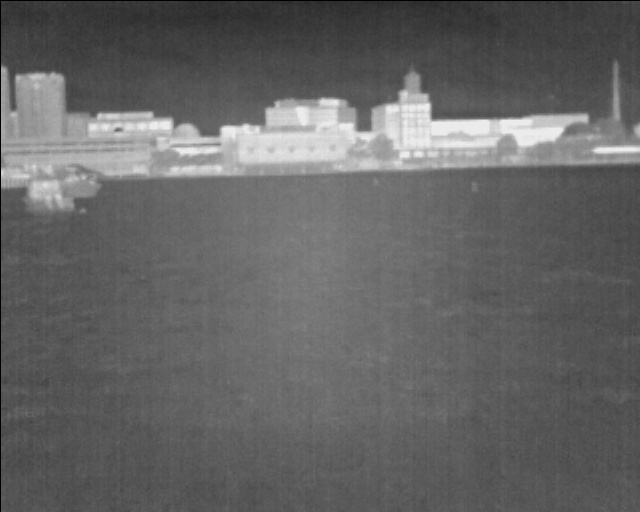

this is the ground truth mask


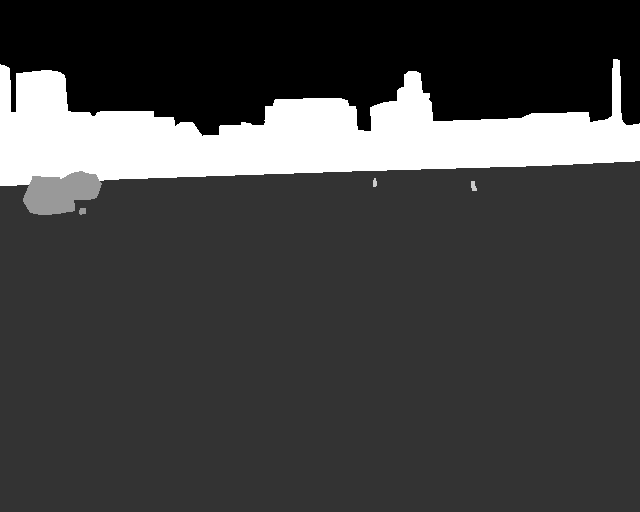

this is the colored inferred image


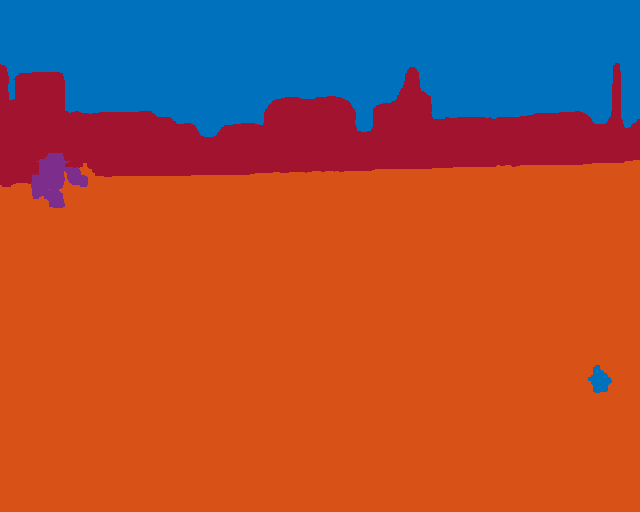

this is the raw image


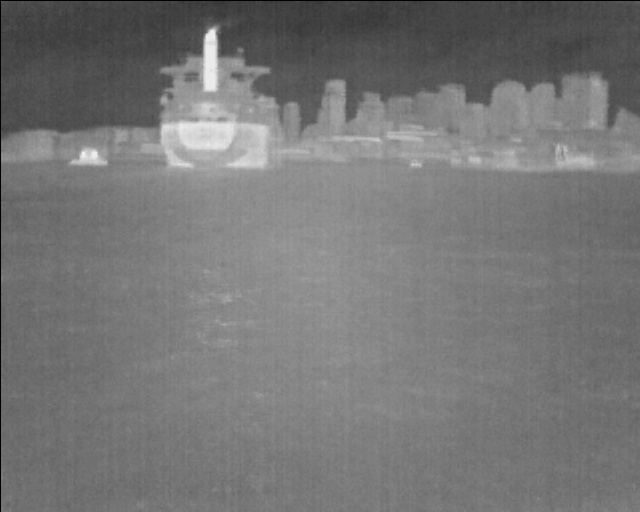

this is the ground truth mask


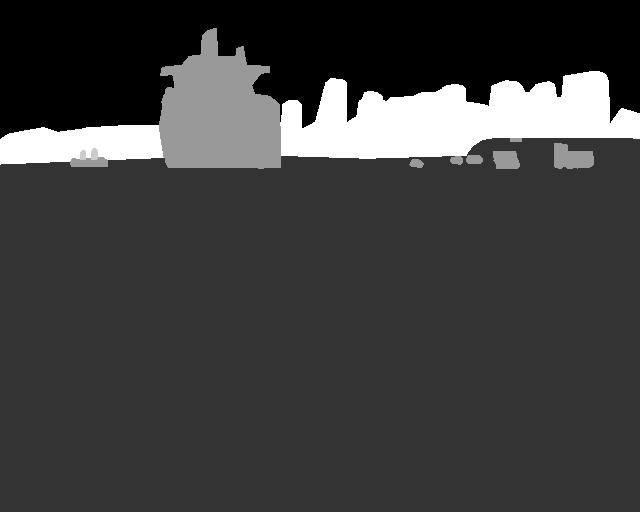

this is the colored inferred image


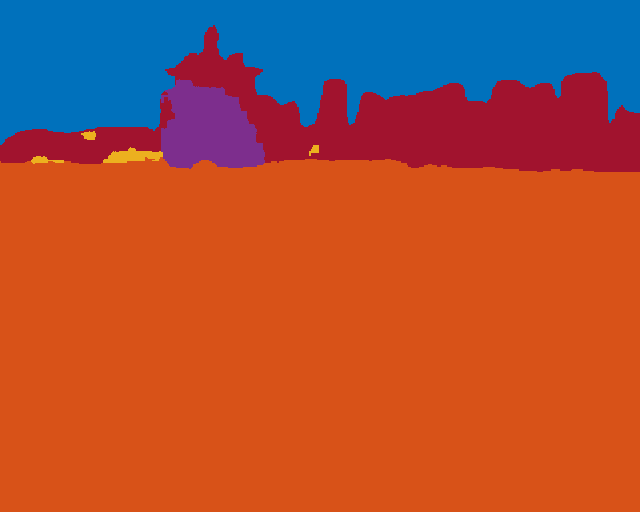

In [ ]:
# Inference 
## Now visualize predictions for a specific image. Change the value of i

def display_mask(i):
    """Quick utility to display a model's prediction. we need color masked images, so displaying both color and black and white"""
    
    #0 - sky(dark.blue). 
    #1 - water(light.blue).   
    #2 - bridge(yellow).   
    #3 - obstacle(purple).  
    #4- living ob(green).  
    #5- backgnd (orange). 
    #6 - self(pink)
    # Colors are same as segments.ai scheme
    label_colours = [(0,113,188), (216,82,24), (236,176,31), (125, 46, 141), (118, 171, 47), (161, 19, 46), (255,0,0)]  
    
    
    mask = np.argmax(test_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    #print("mask shape = ", np.shape(mask))
    #print("mask length = ", len(mask[i, 0]))
    #print("mask length = ", len(mask[i]))
    #print("Unique pixel values = ", np.unique(mask))
    #print("Type of mask = ", type(mask))
    
   
    #img1 = PIL.Image.new('RGB', (640, 512))
    img1 = PIL.Image.new('RGB', img_size_width_ht)
    #print ("image size", img_size_width_ht)
    pixels = img1.load()
    #print(type(pixels))
    #print(pixels[0,0])
    for j_, j in enumerate(mask[:, :, 0]):
        #print (j_, j)
        for k_, k in enumerate(j):
             #print(k_, k)
             if k < num_classes:
                pixels[k_,j_] = label_colours[k]
    output = np.array(img1)

    outputpicturePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/picture' + '/' + str(i) + '--run1--' + imagefilepathtokens[-1]     
    
    print("this is the colored inferred image")
    display(img1)

    ##Saving the category ids in an image for programatic IoU check 
    img1.save(outputpicturePath)

    '''
    print("this is the gray inferred image")
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)
    '''
    return mask
   


# Display results for validation image #40. it uses val_input_images. so will only pick from the ones that we have kept for validation.
#i = 190
for i in range(50,85): 
      # check if ground-truth target mask as any object - class id - 3
      image_gt = tf.keras.preprocessing.image.load_img(target_test_paths[i])
      input_arr = tf.keras.preprocessing.image.img_to_array(image_gt)
      gt_mask_array = np.unique(input_arr) 
      object_living_array = [3,4]
      #print(gt_mask_array)
      #intersect_array_object = np.intersect1d(gt_mask_array, object_array) 
      #intersect_array_living = np.intersect1d(gt_mask_array, living_array) 
      if((set(object_living_array) & set(gt_mask_array))== set(object_living_array)):
          #print ("intersect output 2", gt_mask_array )
          #print(gt_mask_array)
          #display the raw input image 
          print("this is the raw image")
          display(Image(filename=input_test_paths[i]))
          
          #display the ground truth masked image 
          img = PIL.ImageOps.autocontrast(load_img(target_test_paths[i]))
          print("this is the ground truth mask")
          display(img)
          
          #set file names for storing the prediction 
          imagefilepathtokens = input_test_paths[i].split('/')
          #print("tokens = ", imagefilepathtokens)

          outputFilePath = '/content/drive/MyDrive/IRDatasetFinal-Inferences/unet/program' + '/' + str(i) + '--run1--' + imagefilepathtokens[-1] 
          #print("output file name = ", outputFilePath)

          #invoke the prediction function 
          output_mask = display_mask(i)  # Note that the model only sees inputs at 150x150.
          output_mask = np.squeeze(output_mask, axis=2)
          #result = np.where(output_mask==0)
          #print("indices where output_mask has 0 value = ", result)
          output_Im = PIL.Image.fromarray(output_mask.astype(np.uint8))

          ##Saving the category ids in an image for programatic IoU check 
          output_Im.save(outputFilePath)      
      

      
     

       
    

In [ ]:
 '''
 # This check is to see if unet gives pixel values of 0 - means leaves pixels unassigned. 
 # we did not see a single image even when run with 1 epoc where the pixel had a class id of 0 
 # valid class ids were 1,2,3,4,5,6,7
 count = 0 
 for i in range(0,492): 
    mask = np.argmax(test_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    #output_mask = np.squeeze(output_mask, axis=2)
    result = np.where(mask==0)
    if (len(result[0]) > 0): 
        #print("indices where mask has 0 value = ", result)
        count = count+1 
 print("total count of images where there are 0s" , count)
    
'''

In [ ]:
'''
#visualize the architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='softmax'))
plot_model(model, to_file='/content/IR_1000images_he_normal_adam_softmax_relu_100_10-h5-modelplot.png', show_shapes=True, show_layer_names=True)
'''

In [ ]:
'''
# to evaluate the weight tensors
from keras import backend as K

for w in model.trainable_weights:
    print(K.eval(w))
'''

In [ ]:
'''
# visualize the model in tensorboard - we will use the log files created in checkpoint  
#!kill 587

%load_ext tensorboard
import datetime, os

%tensorboard --logdir logs 
'''
 
 

##Save the .pb file in .h5 format 

In [ ]:
'''
import tensorflow as tf
from tensorflow import keras 

model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")
'''


In [ ]:
tf.keras.models.save_model(model,"/content/drive/MyDrive/Models/h5-Unet-7classes-finalpapersubmission.h5")

In [ ]:
#### CODE TO PREDICT ANY IMAGE THAT WILL NOT HAVE A GROUNDTRUTH. INPUT IS A SINGLE IMAGE

test_input_dir1 = "/content/drive/MyDrive/RandomImagesForInference"  
test_target_input_dir1 = "/content/drive/MyDrive/TheIRDatasetMini/testannot"  
test_input_img_paths1 = getFullyQualifiedImagePaths(test_input_dir1)
test_target_img_paths1 = getFullyQualifiedImagePaths(test_target_input_dir1)

test_gen1 = OxfordPets(batch_size, img_size, test_input_img_paths1, test_target_img_paths1)



from IPython.display import Image, display
import PIL
from PIL import ImageOps

reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Models/Unet-7classes-finalpapersubmission")
test_preds1 = reconstructed_model.predict(test_gen1)

## Now visualize predictions for a specific image. Change the value of i

def display_mask(i):
    """Quick utility to display a model's prediction. we need color masked images, so displaying both color and black and white"""
    #label_colours = [(59,193,246), (222,168,51), (161,78,69), (177, 168, 52), (238, 159, 231), (240, 244, 74), (160, 253, 134)]  
    #label_colours = [(246,193,59), (51,168,222), (69,78,161), (52, 168, 177), (231, 159, 238), (74, 244, 240), (134, 253, 160)]  
                    
    #0 - sky(dark.blue). 
    #1 - water(light.blue).   
    #2 - bridge(yellow).   
    #3 - obstacle(purple).  
    #4- living ob(green).  
    #5- backgnd (orange). 
    #6 - self(pink)
    
    label_colours = [(0,113,188), (76,189,237), (236,176,31), (125, 46, 141), (118, 171, 47), (216, 82, 24), (161, 19, 46)]  
    
    
    mask = np.argmax(test_preds1[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    print("mask shape = ", np.shape(mask))
    #print("mask length = ", len(mask[i, 0]))
    #print("mask length = ", len(mask[i]))
    print("Unique pixel values = ", np.unique(mask))
    print("Type of mask = ", type(mask))
    

    img_tst = PIL.Image.new('RGB', (320, 256))
    pixels = img_tst.load()
    print(type(pixels))
    print(pixels[0,0])
    for j_, j in enumerate(mask[:, :, 0]):
        #print (j_, j)
        for k_, k in enumerate(j):
              #print(k_, k)
              if k < num_classes:
                  pixels[k_,j_] = label_colours[k]
    output = np.array(img_tst)
    
    print("this is the colored inferred image")
    display(img_tst)
  

    print("this is the gray inferred image")
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)

    return mask
   


# Display results for validation image #40. it uses val_input_images. so will only pick from the ones that we have kept for validation.
i = 0

imagefilepathtokens = test_input_img_paths[i].split('/')
print("tokens = ", imagefilepathtokens)

#outputFilePath = '/content/drive/MyDrive/TheIRDataset-Inferences/UNET/Prediction' + '/' + str(i) + '--run1--' + imagefilepathtokens[-1] 
#print("output file name = ", outputFilePath)
# Display input image
print("this is the raw image, name = ", test_input_img_paths1[i])
display(Image(filename=test_input_img_paths1[i]))

# Display ground-truth target mask
#print("this is the labeled image")
#img = PIL.ImageOps.autocontrast(load_img(test_target_img_paths[i]))
#display(img)

# Display mask predicted by our model
output_mask = display_mask(i)  # Note that the model only sees inputs at 150x150.
output_mask = np.squeeze(output_mask, axis=2)
output_Im = PIL.Image.fromarray(output_mask.astype(np.uint8))
#output_Im.save(outputFilePath)